In [2]:
from xml.dom import minidom
from scipy import stats
from scipy.stats import shapiro 
from scipy.stats import friedmanchisquare, wilcoxon, mannwhitneyu, ranksums
import itertools
import glob, os
import numpy as np
import statistics as s
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scikit_posthocs as sp
import scipy as scipy

In [3]:
dat = pd.read_csv("Collaborative.csv")
print(dat['SUS'])

0     90.0
1     70.0
2     90.0
3     67.5
4     90.0
5     70.0
6     82.5
7     95.0
8     87.5
9     82.5
10    92.5
11    92.5
12    85.0
13    80.0
14    87.5
15    87.5
16    80.0
17    97.5
18    97.5
19    92.5
20    67.5
21    87.5
22    65.0
23    87.5
24    80.0
25    82.5
26    80.0
27    77.5
28    77.5
29    62.5
30    80.0
31    67.5
32    60.0
33    75.0
34    72.5
35    80.0
36    75.0
37    70.0
38    82.5
39    87.5
Name: SUS, dtype: float64


In [4]:
fc=dat[dat.Method == "Forced commit"]
vc=dat[dat.Method == "Voting commit"]
print("forced:\n", fc['SUS'])
print("voting:\n", vc['SUS'])

forced:
 0     90.0
1     70.0
6     82.5
7     95.0
8     87.5
9     82.5
14    87.5
15    87.5
16    80.0
17    97.5
22    65.0
23    87.5
24    80.0
25    82.5
30    80.0
31    67.5
32    60.0
33    75.0
38    82.5
39    87.5
Name: SUS, dtype: float64
voting:
 2     90.0
3     67.5
4     90.0
5     70.0
10    92.5
11    92.5
12    85.0
13    80.0
18    97.5
19    92.5
20    67.5
21    87.5
26    80.0
27    77.5
28    77.5
29    62.5
34    72.5
35    80.0
36    75.0
37    70.0
Name: SUS, dtype: float64


# confronti tra metodi con statistica

In [5]:
scipy.stats.mannwhitneyu(fc['I worked closely together with my partner'],vc['I worked closely together with my partner'])

MannwhitneyuResult(statistic=208.5, pvalue=0.7939393966559718)

C:\tools\miniconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


std:
 Forced commit    0.888523
Voting commit    0.887041
dtype: float64
mean:
 Forced commit    4.50
Voting commit    4.45
dtype: float64
min
 Forced commit    2
Voting commit    2
dtype: int64
max
 Forced commit    5
Voting commit    5
dtype: int64


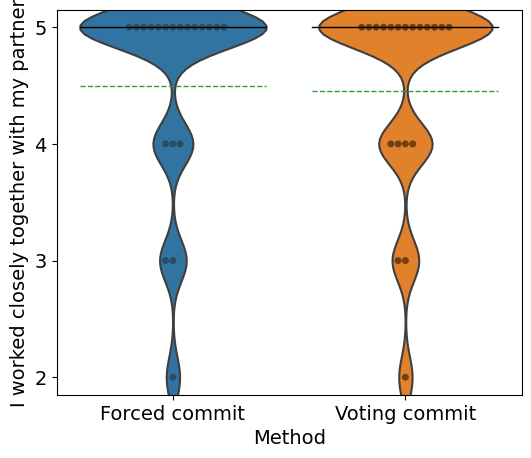

In [6]:
da=[fc['I worked closely together with my partner'],vc['I worked closely together with my partner']]
pdf = pd.DataFrame(np.transpose(da),columns = ["Forced commit","Voting commit"])

fig, ax = plt.subplots(figsize=(6, 5))
#my_pal = {"Forced commit": "green", "Voting commit": "yellow"}
sns.color_palette("colorblind")

sns.violinplot(data=pdf, inner=None, bw=.2)

sns.swarmplot(data=pdf,color="black", edgecolor="gray", alpha=0.5)

sns.boxplot(showmeans=True,
            meanline=True,
            medianprops={'color': 'k', 'ls': '-', 'lw': 1},
            meanprops={'visible': True},
            whiskerprops={'visible': False},
            zorder=10,
            data=pdf,
            showfliers=False,
            showbox=False,
            showcaps=False,
           )
plt.xlabel('Method', fontsize=14)
plt.ylabel('I worked closely together with my partner', fontsize=14)
#plt.title('objects seen')
plt.xticks(fontsize=14)
plt.yticks([2,3,4,5], fontsize=14)
plt.savefig("together.svg")
plt.savefig("together.png")

print("std:\n", pdf.std())
print("mean:\n", pdf.mean())
print("min\n", pdf.min())
print("max\n", pdf.max())

The plot above shows the distributions for both commit methods.
non c'è molta differenza fra i due plots. hanno media alta e simile (scrivi il valore todo), che significa che il task ha alta soddisfazionex. la std è 0.88 per entrabi, quindi la collaborazione è consistente e alta (la maggiro parte dei participants è d'accordo che ha lavorato together closely with their partners)

C:\tools\miniconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


std:
 Forced commit     9.749325
Voting commit    10.172040
dtype: float64
mean:
 Forced commit    81.375
Voting commit    80.375
dtype: float64
min
 Forced commit    60.0
Voting commit    62.5
dtype: float64
max
 Forced commit    97.5
Voting commit    97.5
dtype: float64


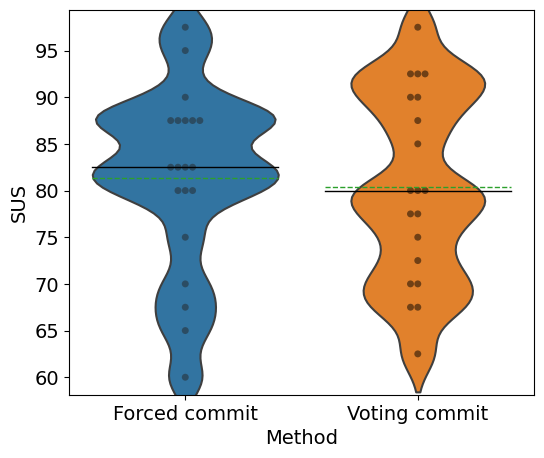

In [7]:
da=[fc['SUS'],vc['SUS']]
pdf = pd.DataFrame(np.transpose(da),columns = ["Forced commit","Voting commit"])
fig, ax = plt.subplots(figsize=(6, 5))
sns.violinplot(data=pdf, inner=None, bw=.2)
sns.swarmplot(data=pdf,color="black", edgecolor="gray", alpha=0.5)
sns.boxplot(showmeans=True,
            meanline=True,
            medianprops={'color': 'k', 'ls': '-', 'lw': 1},
            meanprops={'visible': True},
            whiskerprops={'visible': False},
            zorder=10,
            data=pdf,
            showfliers=False,
            showbox=False,
            showcaps=False,
           )
plt.xlabel('Method', fontsize=14)
plt.ylabel('SUS', fontsize=14)
#plt.title('objects seeen')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("SUS.svg")
plt.savefig("SUS.png")

print("std:\n", pdf.std())
print("mean:\n", pdf.mean())
print("min\n", pdf.min())
print("max\n", pdf.max())

la std di voting è più alta: la distribuzione è più omogenera di poco rispeto al forced, dove invece gli score sono poco più concentrati vicino alla media - risultati più accurati sono scritti prima o dopo insomma nel questionario

C:\tools\miniconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


std:
 Forced commit    0.510418
Voting commit    0.753937
dtype: float64
mean:
 Forced commit    4.55
Voting commit    4.40
dtype: float64
min
 Forced commit    4
Voting commit    3
dtype: int64
max
 Forced commit    5
Voting commit    5
dtype: int64


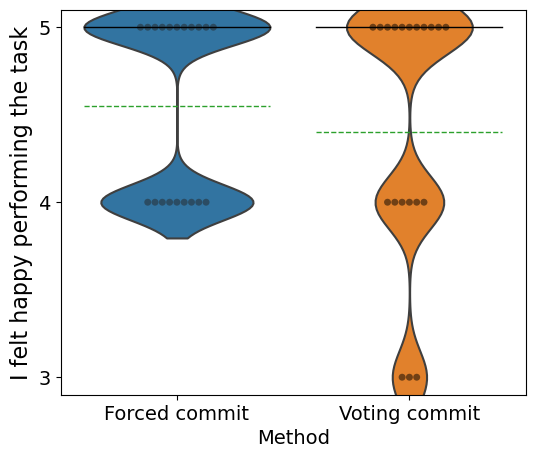

In [8]:
da=[fc['I felt happy performing the task.'],vc['I felt happy performing the task.']]
pdf = pd.DataFrame(np.transpose(da),columns = ["Forced commit","Voting commit"])

fig, ax = plt.subplots(figsize=(6, 5))
sns.violinplot(data=pdf, inner=None, bw=.2)
sns.swarmplot(data=pdf,color="black", edgecolor="gray", alpha=0.5)
sns.boxplot(showmeans=True,
            meanline=True,
            medianprops={'color': 'k', 'ls': '-', 'lw': 1},
            meanprops={'visible': True},
            whiskerprops={'visible': False},
            zorder=10,
            data=pdf,
            showfliers=False,
            showbox=False,
            showcaps=False,
           )
plt.xlabel('Method', fontsize=14)
plt.ylabel('I felt happy performing the task', fontsize=16)
#plt.title('objects seeen')
plt.xticks(fontsize=14)
plt.yticks([3,4,5], fontsize=14)
plt.savefig("happy.svg")
plt.savefig("happy.png")

print("std:\n", pdf.std())
print("mean:\n", pdf.mean())
print("min\n", pdf.min())
print("max\n", pdf.max())

nel voting la std è più alta rispetto al forced: significativo perchè ci sono alcune persone (3) che nel voting hanno detto di essere meno felici di fare il task rispetto al forced, dove in media i vlaori sono + alti. si può ipotizzare che il voting è più laborioso e quindi meno 'desiderabile' rispetto al forced, che è più veloce da usare

In [9]:
data = pd.read_csv("Pairs.csv")
fc=data[data.Method == "Forced commit"]
vc=data[data.Method == "Voting commit"]
data.head()

,ID,Unnamed: 1,time,talking,Subject pair ID,Method,mord
0,1,0.006944,600,35.50,1,Forced commit,1
1,3,0.005787,500,44.60,1,Voting commit,2
2,5,0.006343,548,25.18,2,Voting commit,1
3,7,0.003507,303,23.10,2,Forced commit,2
4,9,0.005301,458,31.00,3,Forced commit,1


C:\tools\miniconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


Forced commit    103.870058
Voting commit     72.271479
dtype: float64
Forced commit    438.1
Voting commit    493.5
dtype: float64
Forced commit    282
Voting commit    366
dtype: int64
Forced commit    600
Voting commit    600
dtype: int64


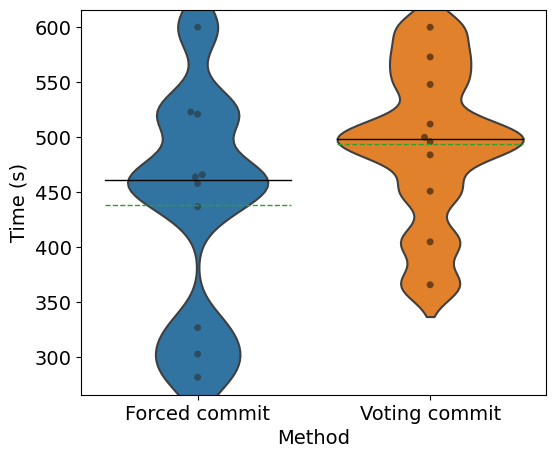

In [10]:
da=[fc['time'],vc['time']]
pdf = pd.DataFrame(np.transpose(da),columns = ["Forced commit","Voting commit"])

fig, ax = plt.subplots(figsize=(6, 5))
sns.violinplot(data=pdf, inner=None, bw=.2)
sns.swarmplot(data=pdf,color="black", edgecolor="gray", alpha=0.5)
sns.boxplot(showmeans=True,
            meanline=True,
            medianprops={'color': 'k', 'ls': '-', 'lw': 1},
            meanprops={'visible': True},
            whiskerprops={'visible': False},
            zorder=10,
            data=pdf,
            showfliers=False,
            showbox=False,
            showcaps=False,
           )
plt.xlabel('Method', fontsize=14)
plt.ylabel('Time (s)', fontsize=14)
#plt.title('objects seeen')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("time.svg")
plt.savefig("time.png")

print(pdf.std())
print(pdf.mean())
print(pdf.min())
print(pdf.max())

rispetto alla media del tempo impiegato, i task eseguiti con forced commit sono più veloci di circa 1 minuto rispetto a quelli eseguiti con un voting commit. la std di forced è più alta: quindi c'è una maggiore variabilità nei tempi dovuta ad alcuni (3) sofggetti che hanno completato il task in breve tempo. (variazione di 1 min e 43), qunado invece nel voting è più bassa (variazione di 1 min e 12 sec). 

C:\tools\miniconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


mean:
 Forced commit    28.237
Voting commit    27.426
dtype: float64


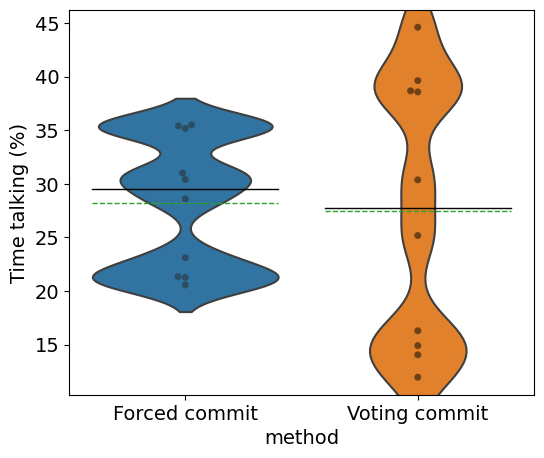

In [11]:
da=[fc['talking'],vc['talking']]
pdf = pd.DataFrame(np.transpose(da),columns = ["Forced commit","Voting commit"])

fig, ax = plt.subplots(figsize=(6, 5))
sns.violinplot(data=pdf, inner=None, bw=.2)
sns.swarmplot(data=pdf,color="black", edgecolor="gray", alpha=0.5)
sns.boxplot(showmeans=True,
            meanline=True,
            medianprops={'color': 'k', 'ls': '-', 'lw': 1},
            meanprops={'visible': True},
            whiskerprops={'visible': False},
            zorder=10,
            data=pdf,
            showfliers=False,
            showbox=False,
            showcaps=False,
           )
plt.xlabel('method', fontsize=14)
plt.ylabel('Time talking (%)', fontsize=14)
#plt.title('objects seeen')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("talking.svg")
plt.savefig("talking.png")

print("std:\n", pdf.std())
print("mean:\n", pdf.mean())
print("min\n", pdf.min())
print("max\n", pdf.max())

l'anaisi della std del forced mostra che per chi esegue task forced il tempo speso a parlare durante il task è attorno al 30% (mean è 28.24, std 6.03), mentre nei task di voting commit non c'è via di mezzo: i soggetti o parlano molto oppure poco (std: 12.16)

In [16]:
scipy.stats.mannwhitneyu(fc['talking'],vc['talking'])

MannwhitneyuResult(statistic=51.0, pvalue=0.9698499769931556)

## correlazione tra time talking e time per i due metodi

          Talking      Time
Talking  1.000000  0.252432
Time     0.252432  1.000000


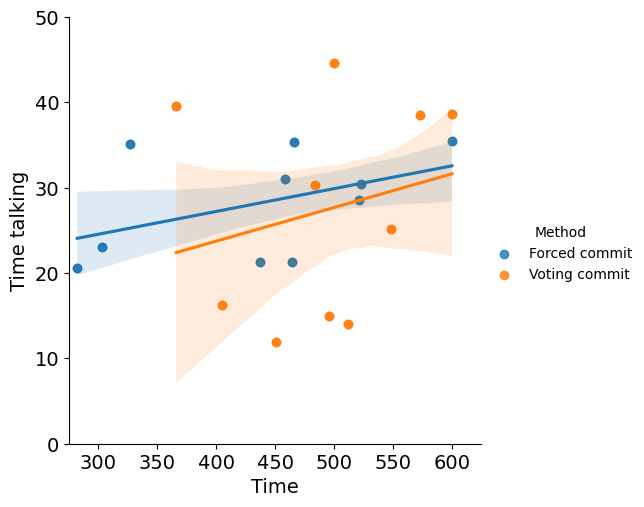

In [17]:
g=sns.lmplot(y="talking", x="time", data=dat, hue="Method");
plt.ylabel('Time talking', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
g.set(ylim=(0, 50))
g.set(xlim=(275, 625))

da=[dat['talking'],dat['time']]
pdf = pd.DataFrame(np.transpose(da),columns = ["Talking","Time"])

print(pdf.corr(method="pearson"))

plt.savefig("timeTalkingAndTimeCorrelation.svg")
plt.savefig("timeTalkingAndTimeCorrelation.png")

non pare esserci correlazione lineare tra il tempo parlato e il tempo impiegato nel task

In [18]:
scipy.stats.mannwhitneyu(fc['time'],vc['time'])

MannwhitneyuResult(statistic=34.5, pvalue=0.25666036991585695)

   Forced commit  Voting commit
0            600            500
1            303            548
2            458            451
3            327            405
4            282            366
5            464            496
6            466            573
7            437            484
8            523            600
9            521            512
               Forced commit  Voting commit
Forced commit       1.000000       0.524669
Voting commit       0.524669       1.000000


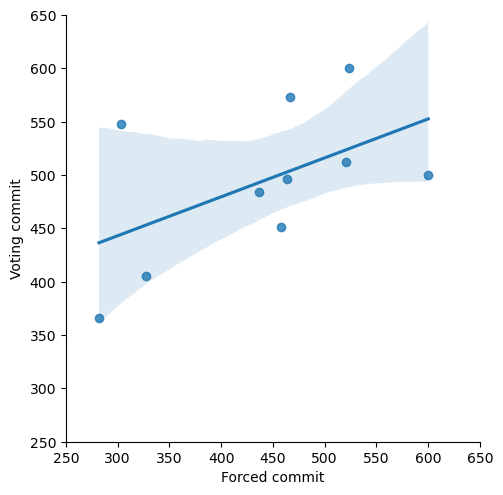

In [21]:
da=[fc['time'], vc['time']]
pdf = pd.DataFrame(np.transpose(da),columns = ["Forced commit","Voting commit"])
print(pdf)

g=sns.lmplot(x="Forced commit", y="Voting commit", data = pdf);
g.set(ylim=(250, 650), xlim=(250, 650))

print(pdf.corr(method="pearson"))

plt.savefig("timeForcedVoting.svg")
plt.savefig("timeForcedVoting.png")


i puntini sono le coppie di task. assi sono i due tipi di task . la correlazione è 0.52: tendono a crescere assieme quindi, for instance, se ci impiegano tanto nel forced allora è probabile che ci impieghino tanto anche nel voting. l'unica eccezione è il paio 2, che nel forced imegabgo 303  sec e nel voting 548 s

   Forced commit  Voting commit
0            600            500
1            303            548
2            458            451
3            327            405
4            282            366
5            464            496
6            466            573
7            437            484
8            523            600
9            521            512
               Forced commit  Voting commit
Forced commit       1.000000       0.524669
Voting commit       0.524669       1.000000


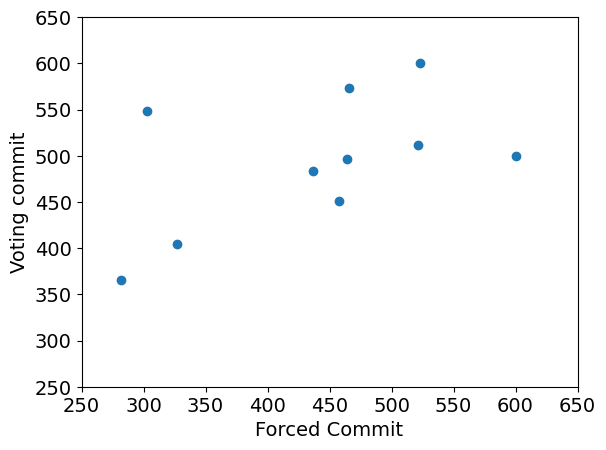

In [16]:
da=[fc['time'], vc['time']]
pdf = pd.DataFrame(np.transpose(da),columns = ["Forced commit","Voting commit"])
print(pdf)

plt.scatter(fc['time'],vc['time'])
plt.xlabel('Forced Commit', fontsize=14)
plt.ylabel('Voting commit', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(250, 650)
plt.xlim(250, 650)

print(pdf.corr(method="pearson"))

plt.savefig("timeForcedVotingScatter.svg")
plt.savefig("timeForcedVotingScatter.png")

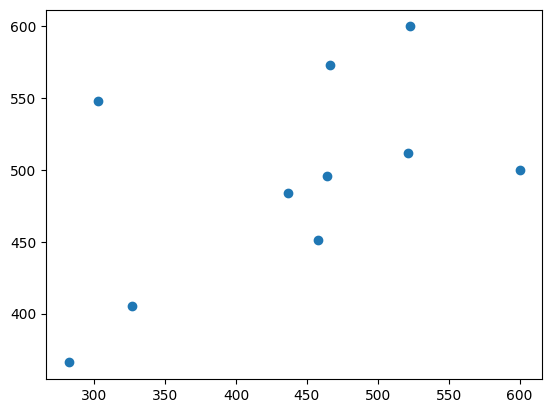

In [17]:
plt.scatter(fc['time'],vc['time'])

In [18]:
#d2 = pd.pivot_table(data, index='Subject pair ID', columns='mord', values=['time','talking'])
#print(d2.mean())

In [19]:
#d3 = pd.pivot_table(data, index='Subject pair ID', columns='Method', values=['time','talking'])
#print(d3.mean())

In [20]:
#print(d3)
